#### Importing Libraries

In [1]:
import pandas as pd;
import numpy as np;
import numpy as np
import matplotlib.pyplot as plt
from PIL import  Image
import seaborn as sns
%matplotlib inline
import emoji

data = pd.read_csv('../data/raw/athlete_events.csv')
regions = pd.read_csv('../data/raw/noc_regions.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [3]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
NOC       230 non-null object
region    227 non-null object
notes     21 non-null object
dtypes: object(3)
memory usage: 5.5+ KB


In [4]:
merged = pd.merge(data, regions, on='NOC', how='left')

## Distribution of the age of gold medalists

Text(0.5, 1.0, 'Distribution of Gold Medals')

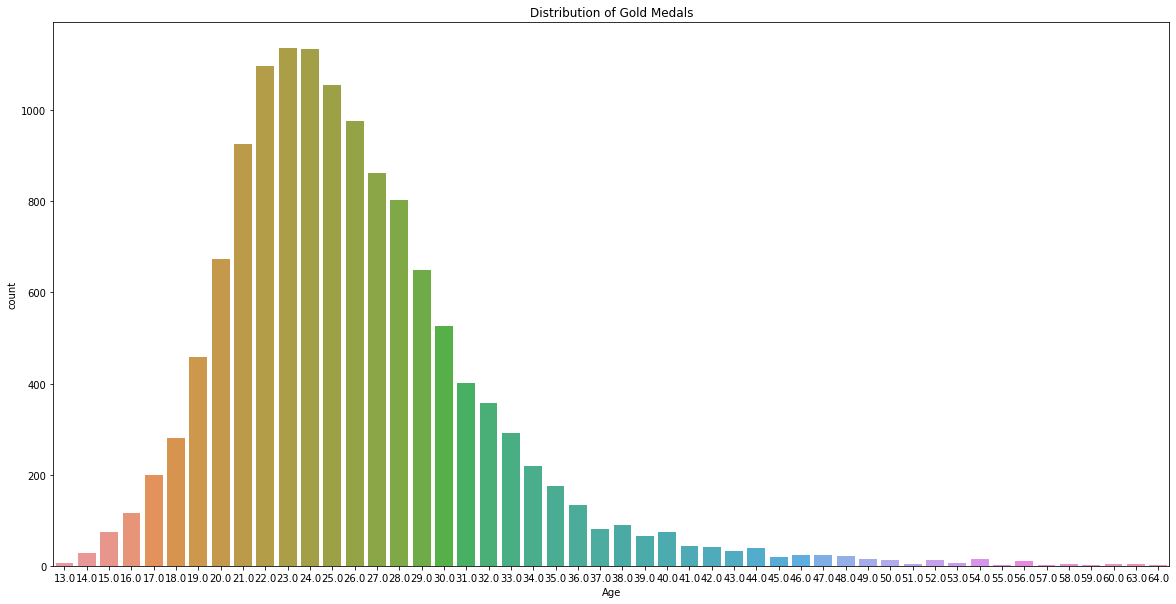

In [5]:
goldMedals = merged[(merged.Medal == 'Gold')]
goldMedals.head()
goldMedals.isnull().any()
goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(goldMedals['Age'])
plt.title('Distribution of Gold Medals')

### There are people who have won gold medals with Age greater than 50 😲😲😲

#### let's see how many people won gold medals after turning 50 🏅

In [6]:
goldMedals['ID'][goldMedals['Age'] > 50].count()

65

### 🕕🕔 people!!!  That's great

### Let's dive deep into age of the olympic participants

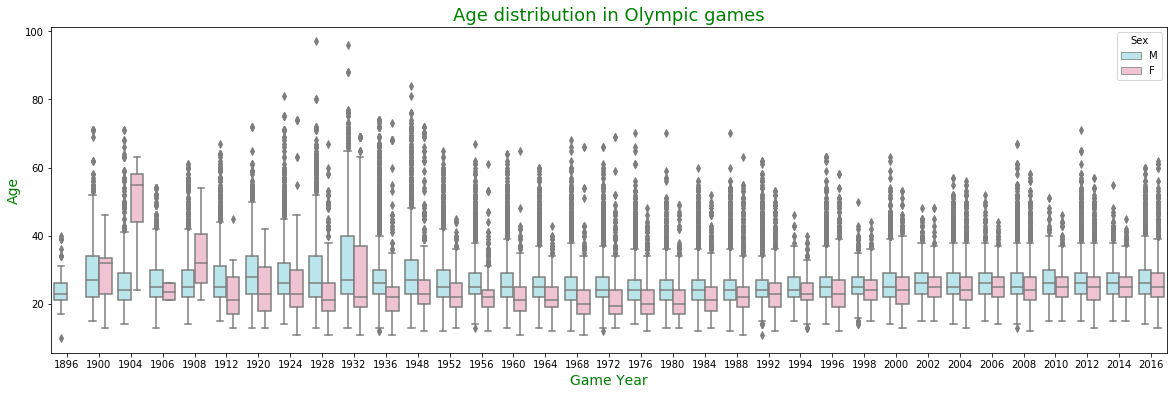

In [7]:
athlete = data
fig, ax = plt.subplots(figsize=(20,6))
a = sns.boxplot(x="Year", y="Age", hue="Sex", palette={"M": "#B2EBF2", "F":"#F8BBD0"}, data=athlete, ax=ax)
        
ax.set_xlabel('Game Year', size=14, color="green")
ax.set_ylabel('Age', size=14, color="green")
ax.set_title('Age distribution in Olympic games', size=18, color="green")
plt.show()

### Two things to observe here :
#### - There are participants, whose age is over 80 👏
#### - In 1904 female age distribution is strongly different from the other Olympics

In [8]:
data.loc[data['Age'] > 80].head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
9371,5146,George Denholm Armour,M,84.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
60861,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
60862,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
60863,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
98118,49663,Winslow Homer,M,96.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
154855,77710,Robert Tait McKenzie,M,81.0,NaN,NaN,Canada,CAN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
236912,118789,Louis Tauzin,M,81.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


### ART COMPETITIONS --- I did not know that the Olympics include Art Competitions!!

### Female age distribution in 1904

In [9]:
data.loc[data['Year'] == 1904].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
711,404,"Louis Grenville ""Lou"" Abell",M,19.0,NaN,NaN,Vesper Boat Club,USA,1904 Summer,1904,Summer,St. Louis,Rowing,Rowing Men's Coxed Eights,Gold
1449,806,"Bartlett S. ""Bart"" Adams",M,38.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Golf,Golf Men's Individual,NaN
1458,813,Edgar Holmes Adams,M,36.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Swimming,Swimming Men's 220 yard Freestyle,NaN
1459,813,Edgar Holmes Adams,M,36.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Swimming,Swimming Men's 880 yard Freestyle,NaN
1460,813,Edgar Holmes Adams,M,36.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Swimming,Swimming Men's One Mile Freestyle,NaN


### Height vs Weight of Olympic Medalists

Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

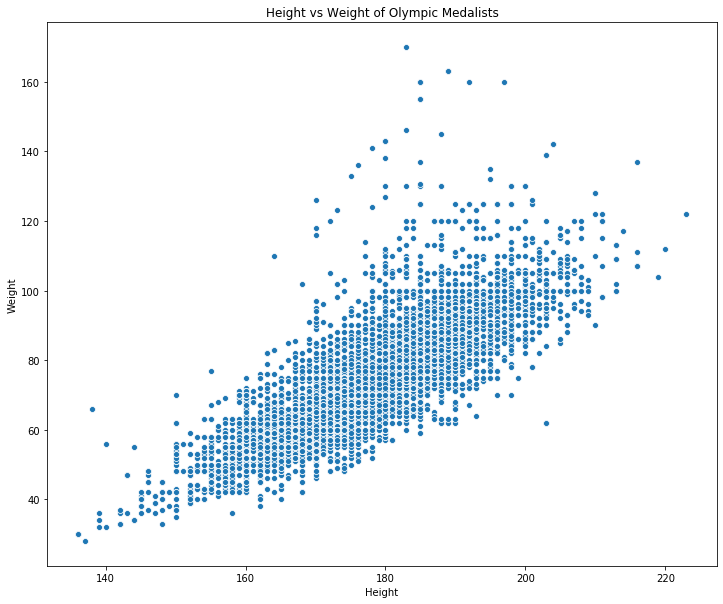

In [10]:
notNullMedals = goldMedals[(goldMedals['Height'].notnull()) & (goldMedals['Weight'].notnull())]
plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x="Height", y="Weight", data=notNullMedals)
plt.title('Height vs Weight of Olympic Medalists')

From above graph it can be seen that the more the weight, the more the height i.e., linear relation

### Let's athelets whose weight is more than 160 kilograms

In [11]:
notNullMedals.loc[notNullMedals['Weight'] > 160]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
39181,20144,Andrey Ivanovich Chemerkin,M,24.0,183.0,170.0,Russia,RUS,1996 Summer,1996,Summer,Atlanta,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Russia,NaN
268659,134407,Leonid Ivanovych Zhabotynskiy,M,26.0,189.0,163.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Weightlifting,Weightlifting Men's Heavyweight,Gold,Russia,NaN
268660,134407,Leonid Ivanovych Zhabotynskiy,M,30.0,189.0,163.0,Soviet Union,URS,1968 Summer,1968,Summer,Mexico City,Weightlifting,Weightlifting Men's Heavyweight,Gold,Russia,NaN


### Ah! Weighlifters!! ---- that makes sense 🏋️‍♂️